## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Data Gathering">Data Gathering</a></li>
<li><a href="#Data Assessment">Data Assessment</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>
<li><a href="#Storing Data">Storing Data</a></li>
<li><a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Intro'></a>
# Ed Sheeran: A Spotify Data Analysis

![Ed Sheeran](Media/Ed-Sheeran-front.png)
As a music lover and a huge fan of Ed Sheeran, I was excited to scrape data from Spotify and analyze his songs. Ed Sheeran is my number one artist on Spotify, so I was curious to learn more about his music from a data-driven perspective. In this analysis, we'll explore various aspects of his songs, from their popularity and duration to their danceability and energy levels. Join me as we dive into the world of Ed Sheeran's music and uncover some interesting insights.

---
---
---

In [1]:
import spotipy
import pandas as pd
import numpy as np
from timeit import default_timer as timer
from datetime import timedelta
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import textwrap

<a id='Data Gathering'></a>
# Data Gathering

In [ ]:
# Spotify API tokens for access
from spotipy.oauth2 import SpotifyClientCredentials

client_id= 'CLIENT_ID'
client_secret = 'CLIENT_SECRET'
client_credentials_manager = SpotifyClientCredentials(
                                client_id = client_id, client_secret = client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
# function to know how long it'll take to scrape the data

def format_time(seconds):
    minutes = seconds // 60
    seconds = seconds % 60
    if minutes > 0:
        return f"{minutes} minutes, {seconds} seconds"
    else:
        return f"{seconds} seconds"

In [ ]:
# create empty lists to store data
artist_name = []
track_name = []
track_id = []
album_name = []
album_id = []
release_date = []
duration_ms = []
popularity = []
explicit = []
danceability = []
energy = []
key = []
loudness = []
genres = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
time_signature = []
featured_artists = []

In [ ]:
# start time
start_time = timer()

# For Ed sheeran as a main artist

# loop through results, using offset to get all tracks
for i in range(0, 1000, 50):
    track_results = sp.search(q='artist:ed sheeran', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        
        # prevent live performance tracks from entering the dataset
        if "live" not in t['name'].lower() and "live" not in t['album']['name'].lower():
            # get track details
            artist_name.append(t['artists'][0]['name'])
            track_name.append(t['name'])
            track_id.append(t['id'])
            album_name.append(t['album']['name'])
            album_id.append(t['album']['id'])
            release_date.append(t['album']['release_date'])
            popularity.append(t['popularity'])
            explicit.append(t['explicit'])

            # get audio features for track
            audio_features = sp.audio_features(t['id'])[0]
            danceability.append(audio_features['danceability'])
            duration_ms.append(audio_features['duration_ms'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            time_signature.append(audio_features['time_signature'])

            
            # get featured artists
            if len(t['artists']) > 1:
                feat_artists = []
                for j in range(1, len(t['artists'])):
                    feat_artists.append(t['artists'][j]['name'])
                featured_artists.append(feat_artists)
            else:
                featured_artists.append([])
              
                
                
# create dataframe from lists
df = pd.DataFrame({
    'artist_name': artist_name,
    'track_name': track_name,
    'track_id': track_id,
    'album_name': album_name,
    'album_id': album_id,
    'release_date': release_date,
    'duration_ms': duration_ms,
    'popularity': popularity,
    'explicit': explicit,
    'danceability': danceability,
    'energy': energy,
    'key': key,
    'loudness': loudness,
    'mode': mode,
    'speechiness': speechiness,
    'acousticness': acousticness,
    'instrumentalness': instrumentalness,
    'liveness': liveness,
    'valence': valence,
    'tempo': tempo,
    'time_signature': time_signature,
    'featured_artists': featured_artists
})



# end time and print
end_time = timer()
elapsed_time = int(end_time - start_time)
print(f"Elapsed time: {format_time(elapsed_time)}")

In [ ]:
# store dataframe as csv file
df.to_csv('Ed Sheeran Spotify Tracks.csv', index=False)

---
<a id='Data Assessment'></a>
# Data Assessment

In [2]:
# loading the metadata of the tracks that exist as at the time this notebook is being written

df = pd.read_csv('Ed Sheeran Spotify Tracks.csv')

In [3]:
df.info()

shape = df.shape
print(f"\n\n The data set has {shape[0]} rows and {shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       978 non-null    object 
 1   track_name        978 non-null    object 
 2   track_id          978 non-null    object 
 3   album_name        978 non-null    object 
 4   album_id          978 non-null    object 
 5   release_date      978 non-null    object 
 6   duration_ms       978 non-null    int64  
 7   popularity        978 non-null    int64  
 8   explicit          978 non-null    bool   
 9   danceability      978 non-null    float64
 10  energy            978 non-null    float64
 11  key               978 non-null    int64  
 12  loudness          978 non-null    float64
 13  mode              978 non-null    int64  
 14  speechiness       978 non-null    float64
 15  acousticness      978 non-null    float64
 16  instrumentalness  978 non-null    float64
 1

In [4]:
# View first 15 rows with all columns
pd.options.display.max_columns = None 
df.head(15)

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
0,Ed Sheeran,Shivers,50nfwKoDiSYg8zOCREWAm5,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,207853,83,False,0.788,0.859,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,4,[]
1,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,263400,85,False,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,3,[]
2,Ed Sheeran,Bad Habits,3rmo8F54jFF8OgYsqTxm5d,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,230747,83,False,0.807,0.893,11,-3.745,0,0.0347,0.04510,0.000028,0.3660,0.537,126.011,4,[]
3,Ed Sheeran,Tenerife Sea,1WTY0VL681yvPxvUuJ5GXY,Intimate Pop,65qTx2hiYqEvBu192EoV8H,2023-02-24,241347,1,False,0.526,0.345,8,-10.497,1,0.0374,0.70000,0.000011,0.1050,0.357,121.877,4,[]
4,Ed Sheeran,Perfect,4oAhMSYRMl1SAv02GbG46I,The Words - Soft 10s,2heLXJ9F1z8P8ypjyale5D,2023-02-21,263400,1,False,0.598,0.448,8,-6.312,1,0.0232,0.16200,0.000000,0.1060,0.168,95.009,3,[]
5,Ed Sheeran,Overpass Graffiti,1QkYsNB4TA2NJwq4kykl8L,Hit It Up,3ReRqGIICTRYl9cGy5UNzL,2023-02-23,236907,0,False,0.520,0.849,9,-3.794,0,0.1860,0.00253,0.000000,0.1190,0.774,175.908,4,[]
6,Ed Sheeran,Noche de novela,7tgdYuyG7vyuQWwUJRAFuC,2022 Rewind,3wKJ0U1gF1yqbk9tLxz6j5,2023-02-22,191896,0,False,0.522,0.585,7,-7.205,1,0.1290,0.00208,0.000000,0.0909,0.411,97.990,4,['Paulo Londra']
7,Ed Sheeran,Shivers,5UuXHpsnE4KKPaVcD1P5JQ,All That Really Matters: Hits Now,2O6uwpC2iC6ZVaaCZpJ2Wy,2023-02-23,207853,0,False,0.788,0.859,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,4,[]
8,Ed Sheeran,Noche de novela,5SxjEDljqUFpkw2UNMz7tB,Mega Pop Mix,2pxZyFVNAh8N7AlVfDJYFO,2023-02-22,191896,0,False,0.522,0.585,7,-7.205,1,0.1290,0.00208,0.000000,0.0909,0.411,97.990,4,['Paulo Londra']
9,Ed Sheeran,Photograph,3ATeaAvchVwa80bSg2fiF6,Love Like That - Feeling Blue,3mqe2Z1a4UjDYdxYZtXeCZ,2023-02-18,258987,0,False,0.718,0.379,4,-10.480,1,0.0359,0.60700,0.000472,0.0986,0.220,108.033,4,[]


In [5]:
# A quick glance shows that "Noche de novela" appears more than once. INvestigating further,

df[df['track_name'] == 'Noche de novela']

# gives the same result as ** df[df['track_name'].str.contains('Noche de novela')] **

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
6,Ed Sheeran,Noche de novela,7tgdYuyG7vyuQWwUJRAFuC,2022 Rewind,3wKJ0U1gF1yqbk9tLxz6j5,2023-02-22,191896,0,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
8,Ed Sheeran,Noche de novela,5SxjEDljqUFpkw2UNMz7tB,Mega Pop Mix,2pxZyFVNAh8N7AlVfDJYFO,2023-02-22,191896,0,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
26,Ed Sheeran,Noche de novela,02u3v7PgAQG4M8a2wqoSSy,Tropical Hits,2tqbyN2aAatZLagWNTwHEn,2023-02-21,191896,0,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
51,Ed Sheeran,Noche de novela,6Zc1FpeuOj41jqWS8nF1eK,Some Latin Hits,1fBCs2MTAlN9DMmHBfAdcQ,2023-02-16,191896,1,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
124,Ed Sheeran,Noche de novela,3mm8QyStd0mbBSzX2WQ0aa,Reggaetón Éxitos,07TLih8JBIJYv5BBov38hy,2023-02-20,191896,1,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
128,Ed Sheeran,Noche de novela,2ZazX4EQfZrkWoca0EZwEW,Hot Latin Hits,0NvLdTDrIySgNFqUvtgEj4,2023-02-16,191896,1,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
133,Ed Sheeran,Noche de novela,2F5Bk49TmkDIOHEKpgEcso,Latin Hits 20's,29ZDCi9G0z6aLJvTI5cNfK,2023-02-21,191896,0,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']
824,Ed Sheeran,Noche de novela,6vIEv5l5BbGxXTsS8cO1Kw,Hot Reggaeton 20s,6CiYJOb4Vo1irNUHxGvuXe,2023-02-21,191896,0,False,0.522,0.585,7,-7.205,1,0.129,0.00208,0.0,0.0909,0.411,97.99,4,['Paulo Londra']


In [6]:
df[df['track_name'] == 'Perfect'].sort_values(by='popularity', ascending=False).head()

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
1,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,263400,85,False,0.599,0.448,8,-6.312,1,0.0232,0.163,0.000,0.1060,0.168,95.050,3,[]
268,Ed Sheeran,Perfect,2R0FW1n6cOkQDJhAkQENsf,Perfect,34MK1MIhRB9evwfomSyMig,2017-07-21,310799,46,False,0.538,0.215,8,-13.881,1,0.0608,0.979,0.901,0.0876,0.112,179.199,3,['The Piano Guys']
541,Ed Sheeran,Perfect,0vLpDTq6TGxKI5xPAwoW2F,Why Can't We Be Friends?,5JZUPjOHK53a9n68f5Djqn,2021-03-05,263400,29,False,0.598,0.448,8,-6.312,1,0.0232,0.162,0.000,0.1060,0.168,95.009,3,[]
345,Ed Sheeran jr,Perfect,0KkTaYH2Szr70G5YZLgA6z,Perfect,5EVOYJ2SEgusyCiOw1XVAr,2022-09-06,61984,28,False,0.734,0.167,8,-19.098,0,0.0461,0.854,0.718,0.1650,0.117,110.114,4,[]
534,Ed Sheeran,Perfect,6hE7M9H7AWVvXHlaMoMb3e,Talking to the Moon - Soft Pop,0hl8eJX2PykIhIPBI0AlRh,2021-04-23,263400,19,False,0.598,0.448,8,-6.312,1,0.0232,0.162,0.000,0.1060,0.168,95.009,3,[]


In [7]:
track_perfect = df[df['track_name'] == 'Perfect']
track_perfect[df.track_id.duplicated(keep = False)]

C:\Users\Zion\AppData\Local\Temp\ipykernel_14888\897602886.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  track_perfect[df.track_id.duplicated(keep = False)]


,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
676,Ed Sheeran,Perfect,09oCjFhI30LRKXtGyJjkPl,Chill Hits 2022,7EwibYmDDr4ZSWMVUhlIdX,2022-07-01,263400,5,False,0.598,0.448,8,-6.312,1,0.0232,0.162,0.0,0.106,0.168,95.009,3,[]
680,Ed Sheeran,Perfect,09oCjFhI30LRKXtGyJjkPl,Chill Hits 2022,7EwibYmDDr4ZSWMVUhlIdX,2022-07-01,263400,5,False,0.598,0.448,8,-6.312,1,0.0232,0.162,0.0,0.106,0.168,95.009,3,[]


In [8]:
df.album_name.sort_values(ascending=True).unique()

array(['+', '1, 2, 3 - Viral Hits', "10's Soft Pop", '100 Easy Hits',
       '100 Greatest Christmas Songs Ever',
       '100 Greatest Dinner Party Songs', '100 Greatest Driving Songs',
       '100 Greatest Party Songs', '100 Love Songs Classic Hits',
       '100 Most Uplifting Songs Ever',
       '1000 Nights (feat. Meek Mill & A Boogie wit da Hoodie)',
       '10:35 - time for hits', '10s Hits', '10s Pop',
       "20's Biggest Bops", "20's Love Songs", "20's Party",
       "20's Pop Songs", "20's Rock", '2022 Rewind', '20er Hits',
       '20s Finest Pop', '21st Century Pop', '2step (Star.One Remix)',
       '2step (The Remixes)', '2step (feat. 1.Cuz)',
       '2step (feat. Antytila)', '2step (feat. Armaan Malik)',
       '2step (feat. Budjerah)', '2step (feat. Chefin)',
       '2step (feat. Denise Chaila)', '2step (feat. Ellinoora)',
       '2step (feat. Leto)', '2step (feat. Lil Baby)',
       '2step (feat. Potter Payper)', '2step (feat. Quevedo)',
       '2step (feat. Ultimo)', '2s

There are 73 tracks by Ed SHeeran titled Perfect, with 2 having the same track ID. This is a unique case of duplicate values, and is similar to the track "Noche de novela". Definetely, there will be other tracks like this.

In [9]:
df[df['album_name'].str.contains('Deluxe')]

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
1,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,263400,85,False,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,3,[]
126,Ed Sheeran,2step,1n4t8sZsyyHeIsJAUY7Mka,R'n'B Deluxe,41DSTx5MSUkNNvjz55j0lI,2023-02-22,163450,0,False,0.693,0.643,4,-5.867,0,0.0828,0.1380,0.000000,0.1080,0.477,95.055,4,['Lil Baby']
142,Ed Sheeran,Shape of You,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,233713,83,False,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,4,[]
143,Ed Sheeran,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,2014-06-21,281560,80,False,0.781,0.445,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,4,[]
144,Ed Sheeran,Photograph,1HNkqx9Ahdgi1Ixy2xkKkL,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,2014-06-21,258987,82,False,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4,[]
145,Ed Sheeran,Castle on the Hill,6PCUP3dWmTjcTtXY02oFdT,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,261154,76,False,0.461,0.834,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,4,[]
146,Ed Sheeran,Happier,2RttW7RAu5nOAfq6YFvApB,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,207520,76,False,0.522,0.385,0,-7.355,1,0.0288,0.5360,0.000000,0.1350,0.236,89.792,4,[]
147,Ed Sheeran,Galway Girl,0afhq8XCExXpqazXczTSve,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,170827,76,False,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,4,[]
156,Ed Sheeran,Supermarket Flowers,4VuS959DSpr82t3qBqCrWG,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,221107,72,False,0.589,0.242,6,-10.517,1,0.0442,0.9140,0.000000,0.0887,0.257,89.749,4,[]
160,Ed Sheeran,Dive,51ChrwmUPDJvedPQnIU8Ls,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,238440,70,False,0.761,0.386,4,-6.158,1,0.0399,0.3550,0.000000,0.0953,0.526,134.943,3,[]


In [10]:
df.featured_artists.sample(n=20, random_state=123)

581                           []
881                           []
368               ['Elton John']
714                           []
85                            []
381                           []
221                           []
704                           []
156                           []
145                           []
908                           []
415                 ['Lil Baby']
914                           []
456                  ['P Money']
375                           []
343    ['FEDUK', 'SLAVA MARLOW']
584                           []
775                 ['Lil Baby']
308                           []
663                 ['Lil Baby']
Name: featured_artists, dtype: object

In [11]:
df.artist_name.unique()

array(['Ed Sheeran', 'Ed Sheeran & Justin Bieber', 'Ed Sheeran jr',
       'Edward Christopher Sheeran', 'Ed Sheeran Taylor Swift',
       'No. 1 Ed Sheeran Fan', 'Ed Sheeran Band', 'Eddi Silver'],
      dtype=object)

In [12]:
df[df['artist_name'] != 'Ed Sheeran'].head(50)

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
152,Ed Sheeran & Justin Bieber,I Don't Care (with Justin Bieber),3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),5Nux7ozBJ5KJ02QYWwrneR,2019-05-10,219947,75,False,0.798,0.675,6,-5.041,1,0.0442,0.09120,0.000000,0.0894,0.842,101.956,4,['Justin Bieber']
174,Ed Sheeran & Justin Bieber,I Don't Care (with Justin Bieber),0hVXuCcriWRGvwMV1r5Yn9,No.6 Collaborations Project,3oIFxDIo2fwuk4lwCmFZCx,2019-07-12,219947,68,False,0.798,0.676,6,-5.041,1,0.0442,0.09020,0.000000,0.0894,0.843,101.956,4,['Justin Bieber']
256,Ed Sheeran jr,Chiraq,0WlIKx95bYbp5FSyEGDgf8,Chiraq,2tVSowJb30U0wIHkPsjFQo,2022-12-27,61138,39,False,0.569,0.945,3,-2.324,0,0.0317,0.13900,0.329000,0.3580,0.931,140.017,4,[]
258,Ed Sheeran jr,Apru,1GZEMY8Rxp265vPoE0rCaB,Apru,37dfnupAknLCPdxELz4MVZ,2022-12-27,63019,39,False,0.593,0.829,11,-2.198,1,0.0520,0.00216,0.885000,0.6800,0.552,140.006,4,[]
313,Ed Sheeran jr,Happier,2mXMy429ZGpZLqDitZNXNQ,Happier,6ljseTw39aY2F1HegpiDP1,2022-09-06,83607,31,False,0.782,0.399,9,-9.537,1,0.3000,0.86700,0.915000,0.1060,0.543,192.029,4,[]
345,Ed Sheeran jr,Perfect,0KkTaYH2Szr70G5YZLgA6z,Perfect,5EVOYJ2SEgusyCiOw1XVAr,2022-09-06,61984,28,False,0.734,0.167,8,-19.098,0,0.0461,0.85400,0.718000,0.1650,0.117,110.114,4,[]
373,Ed Sheeran & Justin Bieber,I Don't Care (with Justin Bieber),1Tu5fpEjGl78R4mA6pQ7Tk,No.6 Collaborations Project,5oUZ9TEZR3wOdvqzowuNwl,2019-07-12,219947,37,False,0.798,0.675,6,-5.041,1,0.0442,0.09120,0.000000,0.0894,0.842,101.956,4,['Justin Bieber']
396,Ed Sheeran jr,Shivers,08CIuzA2hK60XSIl8Itg24,Shivers,63PQcM7djBE00HnDuxlPr1,2022-09-06,70290,23,False,0.709,0.315,5,-13.703,0,0.0439,0.56800,0.913000,0.1040,0.615,149.981,4,[]
529,Edward Christopher Sheeran,Perfect (Arr. for 4 Marimbas),61jjBiwRR0h5xQpoikHGf1,Carmen,5EZXMPhBSrGqW0cpQZ0ibd,2019-09-13,288280,14,False,0.491,0.129,8,-15.460,1,0.0606,0.98400,0.881000,0.0683,0.101,104.021,4,['The Wave Quartet']
602,Ed Sheeran Taylor Swift,The Joker & The Queen,4UvVC1xk0SsRjqiY23Hzqf,"Cover Selections, Vol. 2",50D2189Z9geTW7ERTFB8MZ,2022-10-30,217551,8,False,0.117,0.215,0,-11.835,1,0.0392,0.94500,0.367000,0.0954,0.176,154.684,5,['Amethyst String Quartet']


In [13]:
# check tracks with duplicate track ID
df[df.track_id.duplicated(keep = False)]

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
676,Ed Sheeran,Perfect,09oCjFhI30LRKXtGyJjkPl,Chill Hits 2022,7EwibYmDDr4ZSWMVUhlIdX,2022-07-01,263400,5,False,0.598,0.448,8,-6.312,1,0.0232,0.162,0.0,0.106,0.168,95.009,3,[]
677,Ed Sheeran,2step (feat. Potter Payper),6P0lfcQhycP2MEx8QUBFlH,2step (The Remixes),1nqJFaKVTrCkCDaC2I1zM7,2022-05-26,153447,10,False,0.726,0.671,4,-5.402,0,0.1610,0.140,0.0,0.139,0.552,95.053,4,['Potter Payper']
680,Ed Sheeran,Perfect,09oCjFhI30LRKXtGyJjkPl,Chill Hits 2022,7EwibYmDDr4ZSWMVUhlIdX,2022-07-01,263400,5,False,0.598,0.448,8,-6.312,1,0.0232,0.162,0.0,0.106,0.168,95.009,3,[]
681,Ed Sheeran,2step (feat. Potter Payper),6P0lfcQhycP2MEx8QUBFlH,2step (The Remixes),1nqJFaKVTrCkCDaC2I1zM7,2022-05-26,153447,10,False,0.726,0.671,4,-5.402,0,0.1610,0.140,0.0,0.139,0.552,95.053,4,['Potter Payper']


In [14]:
df.album_id.duplicated().sum()

302

In [15]:
df[df.album_id.duplicated(keep = False)].album_id.unique().size

97

There are 97 album IDs appearing 302 times. For Album ID's, It is expected to have duplicate values as many tracks from one album would all have the same Album ID. AFter further cleaning, it is expected that redundant, duplicate IDs would've been removed

In [16]:
df.album_name.unique().size, df.album_id.unique().size

(661, 676)

In [17]:
df[['track_name', 'track_id', 'album_name', 'album_id']].isna().any()

track_name    False
track_id      False
album_name    False
album_id      False
dtype: bool

---

### Quality Issues

1. There are some tracks that are duplicate. they appear on different albums (e.g deluxes), as singles, and some as covers. e.g **Noche de novela** appearing under **2022 Rewind**, **Mega Pop Mix** and 6 other "albums" across 4 days.
2. Duration_ms should have it's values in minutes and seconds, as oppossed to milliseconds for more readability.
3. Not all enteries under artist_name have "Ed Sheeran" as their value.
4. Change key values from numerals to alphabets.
5. CHange mode values from 0 and 1 to Minor and Major respectively.


### Tidiness Issues
1. Apart from the release date column, there should be column for month and year.
2.

---

<a id='Data CLeaning'></a>
#  Data Cleaning

## Issue 1

Duplicate tracks

### Code

In [18]:
# get all duplicates by track name
duplicates = df[df.duplicated(subset=['track_name'], keep=False)]

# create a list of album names to keep
keep_albums = ["x (Deluxe Edition)", "÷ (Deluxe)", "=", "+", "No.5 Collaborations Project", "No.6 Collaborations Project"]

# drop duplicates with album names not in the keep_albums list
duplicates_to_drop = duplicates[~duplicates['album_name'].isin(keep_albums)]

# drop duplicates to keep the highest rated track
duplicates_to_keep = duplicates.drop(duplicates_to_drop.index)\
                    .sort_values('popularity', ascending=False).drop_duplicates(subset=['track_name'])

# combine the two dataframes, dropping the duplicates that should be dropped
df = pd.concat([df.drop(duplicates_to_drop.index), duplicates_to_keep])

df.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

### Test

In [19]:
df['track_name'].duplicated().sum()

0

In [20]:
# Set maximum rows to the number of rows of the filter output
display_length = df[~df['album_name'].isin(keep_albums)].shape[0]

# show tracks with album name not part of Ed's original album. This will include remixes, live sessions e.t.c
with pd.option_context("display.max_rows", display_length):
    display(df[~df['album_name'].isin(keep_albums)])

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists
155,Ed Sheeran,Perfect Duet (Ed Sheeran & Beyoncé),1bhUWB0zJMIKr9yVPrkEuI,Perfect Duet (Ed Sheeran & Beyoncé),52kvZcbEDm0v2kWZQXjuuA,2017-11-30,259550,69,False,0.587,0.2990,8,-7.365,1,0.0263,0.779000,0.000000,0.1230,0.3560,94.992,3,['Beyoncé']
159,Ed Sheeran,F64,5DFi6D7SrYHRIgZbY5MqqE,F64,5SNPs8Oz8Nmhv0MA6YnJpE,2023-01-19,204894,72,True,0.751,0.6180,6,-6.643,0,0.3240,0.596000,0.000000,0.1290,0.7070,93.728,4,[]
172,Ed Sheeran,Perfect Symphony (Ed Sheeran & Andrea Bocelli),3zl7j5ua8mF4JDYuxrfo01,Perfect Symphony (Ed Sheeran & Andrea Bocelli),2MOs2gBy14kW9jYXbv2A3O,2017-12-15,265363,64,False,0.544,0.4170,8,-4.387,1,0.0247,0.586000,0.000000,0.0850,0.2070,95.156,3,['Andrea Bocelli']
181,Ed Sheeran,One Life,5DXKvETa1xppOmd4CDxs9S,= (Tour Edition),2CIOGAByaHyjQ1EO55JSzC,2022-05-27,231547,63,False,0.573,0.5930,6,-7.225,1,0.0299,0.114000,0.000003,0.1220,0.4250,159.978,4,[]
189,Ed Sheeran,Shivers - Ofenbach Remix,1eGlStOBtFJ6Oc4hhN5tUR,Shivers (Ofenbach Remix),3Dru9IyxnZXhmrNbSv56yl,2021-10-08,187248,67,False,0.861,0.8320,2,-3.350,1,0.0457,0.011900,0.000000,0.0461,0.9170,126.989,4,['Ofenbach']
190,Ed Sheeran,South of the Border (feat. Camila Cabello & Ca...,19TOAlTFq0NDHvUPQR0tkr,South of the Border (feat. Camila Cabello & Ca...,3BjxjIkTZKUpeZ6n5MYMNx,2019-09-27,195924,61,False,0.845,0.7660,2,-5.727,0,0.0658,0.212000,0.000000,0.1110,0.7820,114.054,4,"['Cardi B', 'Camila Cabello', 'Cheat Codes']"
204,Ed Sheeran,Beautiful People (feat. Khalid) - NOTD Remix,6J7WMB5GII6pEOzy687jhO,Beautiful People (feat. Khalid) [NOTD Remix],2oEcytQ5u5QtR9VZc2XgE2,2019-07-11,162081,58,False,0.702,0.7940,3,-5.913,1,0.0562,0.007150,0.000046,0.1100,0.3700,103.972,4,"['Khalid', 'NOTD']"
222,Ed Sheeran,Shivers (feat. Jessi & SUNMI),1A3T3npKsrElQTjTEcr3LR,Shivers (feat. Jessi & SUNMI),7HRCvQbIY5cRkgCkSM0vO3,2021-10-28,207867,57,False,0.739,0.8730,2,-2.595,1,0.0878,0.268000,0.000000,0.0454,0.8630,141.026,4,"['Jessi', 'SUNMI']"
224,Ed Sheeran,Make It Rain,5puU24G3lHVsUXPAWW2ZpV,x (Wembley Edition),6NoBzYmh5gUusGPCfg0pct,2013,404480,46,False,0.618,0.2390,8,-8.371,0,0.0274,0.791000,0.000000,0.1000,0.3270,96.846,3,[]
231,Ed Sheeran,Shivers - Navos Remix,7G8bZSpRNFOj3nc8SbFXWP,Shivers (Navos Remix),69DRYXihs3DVdAPNMiikJk,2021-10-01,155646,57,False,0.695,0.7860,2,-5.974,1,0.0295,0.170000,0.000019,0.0333,0.8220,127.995,4,['Navos']


A look at this shows that row with index 574 is the duplicate left in the dataset. It is a dupliate of the original South Of The Border song, not remixes or live edition.

In [21]:
# drop both occurences
df = df.drop(index=574)

## Issue 2

Correct artist name to have only Ed Sheeran enteries.

### Code

In [22]:
artist_list = df.artist_name.unique()
artist_list

array(['Ed Sheeran', 'Ed Sheeran & Justin Bieber', 'Ed Sheeran jr',
       'Ed Sheeran Taylor Swift', 'No. 1 Ed Sheeran Fan',
       'Edward Christopher Sheeran', 'Ed Sheeran Band'], dtype=object)

In [23]:
# add 'Taylor Swift' to the featured_artist column for 'Ed Sheeran Taylor Swift' row
mask = df['artist_name'] == 'Ed Sheeran Taylor Swift'
index = df.index[mask][0]  # get the index of the first row where mask is True
df.at[index, 'featured_artists'] = ['\'Taylor Swift\'', '\'Amethyst String Quartet\'']

# replace empty lists with NaN
df['featured_artists'] = df['featured_artists'].replace('[]', np.nan)

# remove single quotes, double quotes and square brackets
df['featured_artists'] = df['featured_artists'].str.replace(r"[\[\]\'\"]", "")
df['featured_artists'] = df['featured_artists'].replace('nan', np.nan)


# replace 'Ed Sheeran & Justin Bieber' and 'Ed Sheeran Taylor Swift' with 'Ed Sheeran'
df['artist_name'] = df['artist_name'].replace(['Ed Sheeran & Justin Bieber', 'Ed Sheeran Taylor Swift'], 'Ed Sheeran')

# drop rows with unwanted artist_names
df = df[~df['artist_name'].isin(['No. 1 Ed Sheeran Fan', 'Edward Christopher Sheeran', 'Ed Sheeran Band', 'Ed Sheeran jr'])]

C:\Users\Zion\AppData\Local\Temp\ipykernel_14888\3073223175.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['featured_artists'] = df['featured_artists'].str.replace(r"[\[\]\'\"]", "")


### Test

In [24]:
df.artist_name.unique()

array(['Ed Sheeran'], dtype=object)

## Issue 3

'duration_ms' should have it's values in minutes and seconds

### Code

In [25]:
# convert the duration column to a timedelta format
df['duration_ms'] = pd.to_timedelta(df['duration_ms'], unit='ms')

# extract the minutes and seconds components of the duration as strings
df['duration'] = df['duration_ms'].dt.components['minutes'].astype(str).str.zfill(2) + ':' + df['duration_ms'].dt.components['seconds'].astype(str).str.zfill(2)
df.drop(columns=['duration_ms'])

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists,duration
0,Ed Sheeran,Shivers,50nfwKoDiSYg8zOCREWAm5,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,83,False,0.788,0.8590,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.8220,141.020,4,NaN,03:27
1,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,85,False,0.599,0.4480,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.1680,95.050,3,NaN,04:23
2,Ed Sheeran,Bad Habits,3rmo8F54jFF8OgYsqTxm5d,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,83,False,0.807,0.8930,11,-3.745,0,0.0347,0.04510,0.000028,0.3660,0.5370,126.011,4,NaN,03:50
142,Ed Sheeran,Shape of You,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,83,False,0.825,0.6520,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,4,NaN,03:53
143,Ed Sheeran,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,2014-06-21,80,False,0.781,0.4450,2,-6.061,1,0.0295,0.47400,0.000000,0.1840,0.5910,78.998,4,NaN,04:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Ed Sheeran,Perfect - Acoustic Cover,4u8tbLHI3l273ZpV77d5Iv,Relaxing Classical Playlist: Soothing Piano & ...,3NuDzeI1UJ6PcRmAhmV6kP,2019-01-28,15,False,0.257,0.2540,5,-6.783,1,0.0332,0.94700,0.008560,0.1150,0.1880,174.267,3,Philip De Blue,03:42
602,Ed Sheeran,The Joker & The Queen,4UvVC1xk0SsRjqiY23Hzqf,"Cover Selections, Vol. 2",50D2189Z9geTW7ERTFB8MZ,2022-10-30,8,False,0.117,0.2150,0,-11.835,1,0.0392,0.94500,0.367000,0.0954,0.1760,154.684,5,NaN,03:37
691,Ed Sheeran,Perfect / Adagio Cantabile,4pO9hlYGV4XxkTU3vdUllK,Simon Michael,5eIIvvKzXJu99IG8yfcB6E,2018-11-23,3,False,0.349,0.0701,8,-19.269,1,0.0522,0.96500,0.898000,0.1080,0.0393,96.363,1,"Ludwig van Beethoven, Simon Michael",04:52
792,Ed Sheeran,Happier - Tiësto's AFTR:HRS Remix,0G5gyl2w6HzKZNjFVswyko,After Hours,3Z2TUvdODAZxOEI8EL2DYC,2023-02-22,2,False,0.684,0.8230,0,-4.881,1,0.0296,0.00569,0.000007,0.2010,0.3840,117.994,4,Tiësto,03:36


### Test

In [26]:
df.duration_ms.head()

0     0 days 00:03:27.853000
1     0 days 00:04:23.400000
2     0 days 00:03:50.747000
142   0 days 00:03:53.713000
143   0 days 00:04:41.560000
Name: duration_ms, dtype: timedelta64[ns]

## Issue 4

Correct Key values

### Code

In [27]:
# create a dictionary to map the key numbers to their corresponding letters
key_dict = {
    0: "C",
    1: "C#/Db",
    2: "D",
    3: "D#/Eb",
    4: "E",
    5: "F",
    6: "F#/Gb",
    7: "G",
    8: "G#/Ab",
    9: "A",
    10: "A#/Bb",
    11: "B",
    -1: "NaN"
}

df['key'] = df['key'].apply(lambda x: key_dict[x])

### Test

In [28]:
df.key.head()

0          D
1      G#/Ab
2          B
142    C#/Db
143        D
Name: key, dtype: object

## Issue 5

Correct Mode values

### Code

In [29]:
# create a dictionary to map the key numbers to their corresponding letters
mode_dict = {
    0: "Minor",
    1: "Major"
}

df['mode'] = df['mode'].apply(lambda x: mode_dict[x])

### Test

In [30]:
df['mode'].head()

0      Major
1      Major
2      Minor
142    Minor
143    Major
Name: mode, dtype: object

## Issue 6

Release date should have day month and year columns

In [31]:
# convert release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# extract month and year from release_date column
df['release_day'] = df['release_date'].dt.strftime('%A')
df['release_month'] = df['release_date'].dt.strftime('%B')
df['release_year'] = df['release_date'].dt.year

# Order the Days and Months.
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

df['release_month'] = df['release_month'].astype(CategoricalDtype(categories = months, ordered = True))
df['release_day'] = df['release_day'].astype(CategoricalDtype(categories = days, ordered = True))

### Test

In [32]:
df.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists,duration,release_day,release_month,release_year
0,Ed Sheeran,Shivers,50nfwKoDiSYg8zOCREWAm5,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,0 days 00:03:27.853000,83,False,0.788,0.859,D,-2.724,Major,0.0856,0.2810,0.000000,0.0424,0.822,141.020,4,NaN,03:27,Friday,October,2021
1,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:04:23.400000,85,False,0.599,0.448,G#/Ab,-6.312,Major,0.0232,0.1630,0.000000,0.1060,0.168,95.050,3,NaN,04:23,Friday,March,2017
2,Ed Sheeran,Bad Habits,3rmo8F54jFF8OgYsqTxm5d,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,0 days 00:03:50.747000,83,False,0.807,0.893,B,-3.745,Minor,0.0347,0.0451,0.000028,0.3660,0.537,126.011,4,NaN,03:50,Friday,October,2021
142,Ed Sheeran,Shape of You,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:03:53.713000,83,False,0.825,0.652,C#/Db,-3.183,Minor,0.0802,0.5810,0.000000,0.0931,0.931,95.977,4,NaN,03:53,Friday,March,2017
143,Ed Sheeran,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,2014-06-21,0 days 00:04:41.560000,80,False,0.781,0.445,D,-6.061,Major,0.0295,0.4740,0.000000,0.1840,0.591,78.998,4,NaN,04:41,Saturday,June,2014


---
<a id='Storing Data'></a>
# Storing Data

In [33]:
# Store dataset
df.to_csv('Ed Sheeran Spotify Tracks Cleaned.csv', index=False)

---
<a id='Analyzing and Visualizing Data'></a>
# Analyzing and Visualizing Data

In [34]:
# Load dataframe for analysis
df = pd.read_csv('Ed Sheeran Spotify Tracks Cleaned.csv')

In [35]:
df.head(10)

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists,duration,release_day,release_month,release_year
0,Ed Sheeran,Shivers,50nfwKoDiSYg8zOCREWAm5,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,0 days 00:03:27.853000,83,False,0.788,0.859,D,-2.724,Major,0.0856,0.2810,0.000000,0.0424,0.822,141.020,4,NaN,03:27,Friday,October,2021
1,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:04:23.400000,85,False,0.599,0.448,G#/Ab,-6.312,Major,0.0232,0.1630,0.000000,0.1060,0.168,95.050,3,NaN,04:23,Friday,March,2017
2,Ed Sheeran,Bad Habits,3rmo8F54jFF8OgYsqTxm5d,=,32iAEBstCjauDhyKpGjTuq,2021-10-29,0 days 00:03:50.747000,83,False,0.807,0.893,B,-3.745,Minor,0.0347,0.0451,0.000028,0.3660,0.537,126.011,4,NaN,03:50,Friday,October,2021
3,Ed Sheeran,Shape of You,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:03:53.713000,83,False,0.825,0.652,C#/Db,-3.183,Minor,0.0802,0.5810,0.000000,0.0931,0.931,95.977,4,NaN,03:53,Friday,March,2017
4,Ed Sheeran,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,2014-06-21,0 days 00:04:41.560000,80,False,0.781,0.445,D,-6.061,Major,0.0295,0.4740,0.000000,0.1840,0.591,78.998,4,NaN,04:41,Saturday,June,2014
5,Ed Sheeran,Photograph,1HNkqx9Ahdgi1Ixy2xkKkL,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,2014-06-21,0 days 00:04:18.987000,82,False,0.614,0.379,E,-10.480,Major,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4,NaN,04:18,Saturday,June,2014
6,Ed Sheeran,Castle on the Hill,6PCUP3dWmTjcTtXY02oFdT,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:04:21.154000,76,False,0.461,0.834,D,-4.868,Major,0.0989,0.0232,0.000011,0.1400,0.471,135.007,4,NaN,04:21,Friday,March,2017
7,Ed Sheeran,Happier,2RttW7RAu5nOAfq6YFvApB,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:03:27.520000,76,False,0.522,0.385,C,-7.355,Major,0.0288,0.5360,0.000000,0.1350,0.236,89.792,4,NaN,03:27,Friday,March,2017
8,Ed Sheeran,Galway Girl,0afhq8XCExXpqazXczTSve,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,2017-03-03,0 days 00:02:50.827000,76,False,0.624,0.876,A,-3.374,Major,0.1000,0.0735,0.000000,0.3270,0.781,99.943,4,NaN,02:50,Friday,March,2017
9,Ed Sheeran,South of the Border (feat. Camila Cabello & Ca...,4vUmTMuQqjdnvlZmAH61Qk,No.6 Collaborations Project,3oIFxDIo2fwuk4lwCmFZCx,2019-07-12,0 days 00:03:24.467000,72,False,0.857,0.621,A,-6.376,Minor,0.0825,0.1480,0.000000,0.0865,0.668,97.989,4,"Camila Cabello, Cardi B",03:24,Friday,July,2019


In [36]:
df.tail(10)

,artist_name,track_name,track_id,album_name,album_id,release_date,duration_ms,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,featured_artists,duration,release_day,release_month,release_year
145,Ed Sheeran,Happier - Cazzette Remix,6clKcUAaMHTlSR8MgT3QvS,Happier (Cazzette Remix),7057vj3r5jVIlis4uVnP2M,2018-06-08,0 days 00:03:27.491000,25,False,0.712,0.6330,A,-7.748,Minor,0.0344,0.06430,0.000893,0.1270,0.2990,102.985,4,CAZZETTE,03:27,Friday,June,2018
146,Ed Sheeran,Beautiful People (feat. Khalid) - Danny L Harl...,7fzqEoX5HCLwmt6aPxf54A,Beautiful People (feat. Khalid) [Danny L Harle...,6Ev0UgdNwWq80Em5jknB95,2019-07-11,0 days 00:03:45.367000,21,False,0.458,0.9300,G,-4.610,Major,0.1300,0.03720,0.015400,0.1150,0.3100,148.129,4,"Khalid, Danny L Harle",03:45,Thursday,July,2019
147,Ed Sheeran,"You Need Me, I Don't Need You - Spotify Sessions",5OebvB477bOvqMgbsracwL,Spotify Session,3Zao4egmTSVP5LfAhHO4o1,2011-01-01,0 days 00:03:14.650000,22,False,0.680,0.2860,D,-16.237,Major,0.4410,0.41700,0.000000,0.6990,0.9160,111.734,4,NaN,03:14,Saturday,January,2011
148,Ed Sheeran,Shivers - Heavy-K Remix,5MRwcwEgqPBJNOvPDy3QST,Shivers (Heavy-K Remix),1d8qU99e4NtOklIOsggsFV,2021-10-26,0 days 00:05:40.243000,18,False,0.796,0.6080,B,-9.763,Minor,0.0372,0.04870,0.000113,0.0493,0.3150,112.984,4,Heavy-K,05:40,Tuesday,October,2021
149,Ed Sheeran,Intro - Spotify Sessions,1tdB5NdMqSWMpH6LV7LkRM,Spotify Session,3Zao4egmTSVP5LfAhHO4o1,2011-01-01,0 days 00:00:30.010000,15,False,0.718,0.4460,F#/Gb,-18.466,Major,0.9580,0.50500,0.000000,0.2170,0.1270,92.076,1,NaN,00:30,Saturday,January,2011
150,Ed Sheeran,Perfect - Acoustic Cover,4u8tbLHI3l273ZpV77d5Iv,Relaxing Classical Playlist: Soothing Piano & ...,3NuDzeI1UJ6PcRmAhmV6kP,2019-01-28,0 days 00:03:42.414000,15,False,0.257,0.2540,F,-6.783,Major,0.0332,0.94700,0.008560,0.1150,0.1880,174.267,3,Philip De Blue,03:42,Monday,January,2019
151,Ed Sheeran,The Joker & The Queen,4UvVC1xk0SsRjqiY23Hzqf,"Cover Selections, Vol. 2",50D2189Z9geTW7ERTFB8MZ,2022-10-30,0 days 00:03:37.551000,8,False,0.117,0.2150,C,-11.835,Major,0.0392,0.94500,0.367000,0.0954,0.1760,154.684,5,NaN,03:37,Sunday,October,2022
152,Ed Sheeran,Perfect / Adagio Cantabile,4pO9hlYGV4XxkTU3vdUllK,Simon Michael,5eIIvvKzXJu99IG8yfcB6E,2018-11-23,0 days 00:04:52.313000,3,False,0.349,0.0701,G#/Ab,-19.269,Major,0.0522,0.96500,0.898000,0.1080,0.0393,96.363,1,"Ludwig van Beethoven, Simon Michael",04:52,Friday,November,2018
153,Ed Sheeran,Happier - Tiësto's AFTR:HRS Remix,0G5gyl2w6HzKZNjFVswyko,After Hours,3Z2TUvdODAZxOEI8EL2DYC,2023-02-22,0 days 00:03:36,2,False,0.684,0.8230,C,-4.881,Major,0.0296,0.00569,0.000007,0.2010,0.3840,117.994,4,Tiësto,03:36,Wednesday,February,2023
154,Ed Sheeran,Sunburn - Remix,3I8xsi5RtE97qRKSUaQWgr,Summer Love,22N0ghVULyh8Ktxi2AjYvq,2022-07-08,0 days 00:04:26.053000,0,False,0.533,0.1700,G,-11.342,Major,0.0670,0.84300,0.000005,0.1130,0.3310,116.906,5,NaN,04:26,Friday,July,2022


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       155 non-null    object 
 1   track_name        155 non-null    object 
 2   track_id          155 non-null    object 
 3   album_name        155 non-null    object 
 4   album_id          155 non-null    object 
 5   release_date      155 non-null    object 
 6   duration_ms       155 non-null    object 
 7   popularity        155 non-null    int64  
 8   explicit          155 non-null    bool   
 9   danceability      155 non-null    float64
 10  energy            155 non-null    float64
 11  key               155 non-null    object 
 12  loudness          155 non-null    float64
 13  mode              155 non-null    object 
 14  speechiness       155 non-null    float64
 15  acousticness      155 non-null    float64
 16  instrumentalness  155 non-null    float64
 1

In [38]:
# convert date columns to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Order day and month columns
df['release_month'] = df['release_month'].astype(CategoricalDtype(categories = months, ordered = True))
df['release_day'] = df['release_day'].astype(CategoricalDtype(categories = days, ordered = True))

In [39]:
df.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,49.600000,0.663303,0.585219,-7.263903,0.102354,0.364486,0.020657,0.163546,0.529968,113.273626,3.877419,2016.819355
std,17.740774,0.136163,0.230570,3.351559,0.114021,0.294595,0.121672,0.133712,0.235287,24.602407,0.501109,3.747676
min,0.000000,0.117000,0.070100,-19.269000,0.023200,0.000245,0.000000,0.024800,0.039300,62.631000,1.000000,2011.000000
25%,38.500000,0.579000,0.382000,-8.701000,0.037600,0.103000,0.000000,0.087650,0.334500,95.003500,4.000000,2014.000000
50%,51.000000,0.686000,0.637000,-6.373000,0.056000,0.304000,0.000000,0.117000,0.518000,105.177000,4.000000,2017.000000
75%,61.500000,0.765000,0.795000,-5.199500,0.112500,0.590500,0.000018,0.175500,0.724000,129.849500,4.000000,2019.500000
max,85.000000,0.885000,0.930000,-1.397000,0.958000,0.965000,0.940000,0.798000,0.961000,175.908000,5.000000,2023.000000


In [40]:
# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context("paper")
base_colour = sns.color_palette()[2]

In [41]:
def prop_(x):
    
    '''To calculate proportions of values in a column.
    x will be df.col or df['col']'''
    
    max_var_count = x.value_counts()[0]
    var_sum = x.value_counts().sum()
    max_prop = max_var_count/var_sum
    tick_props = np.arange(0,max_prop+0.05, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    
    return [tick_props, tick_names, var_sum]

## Insights

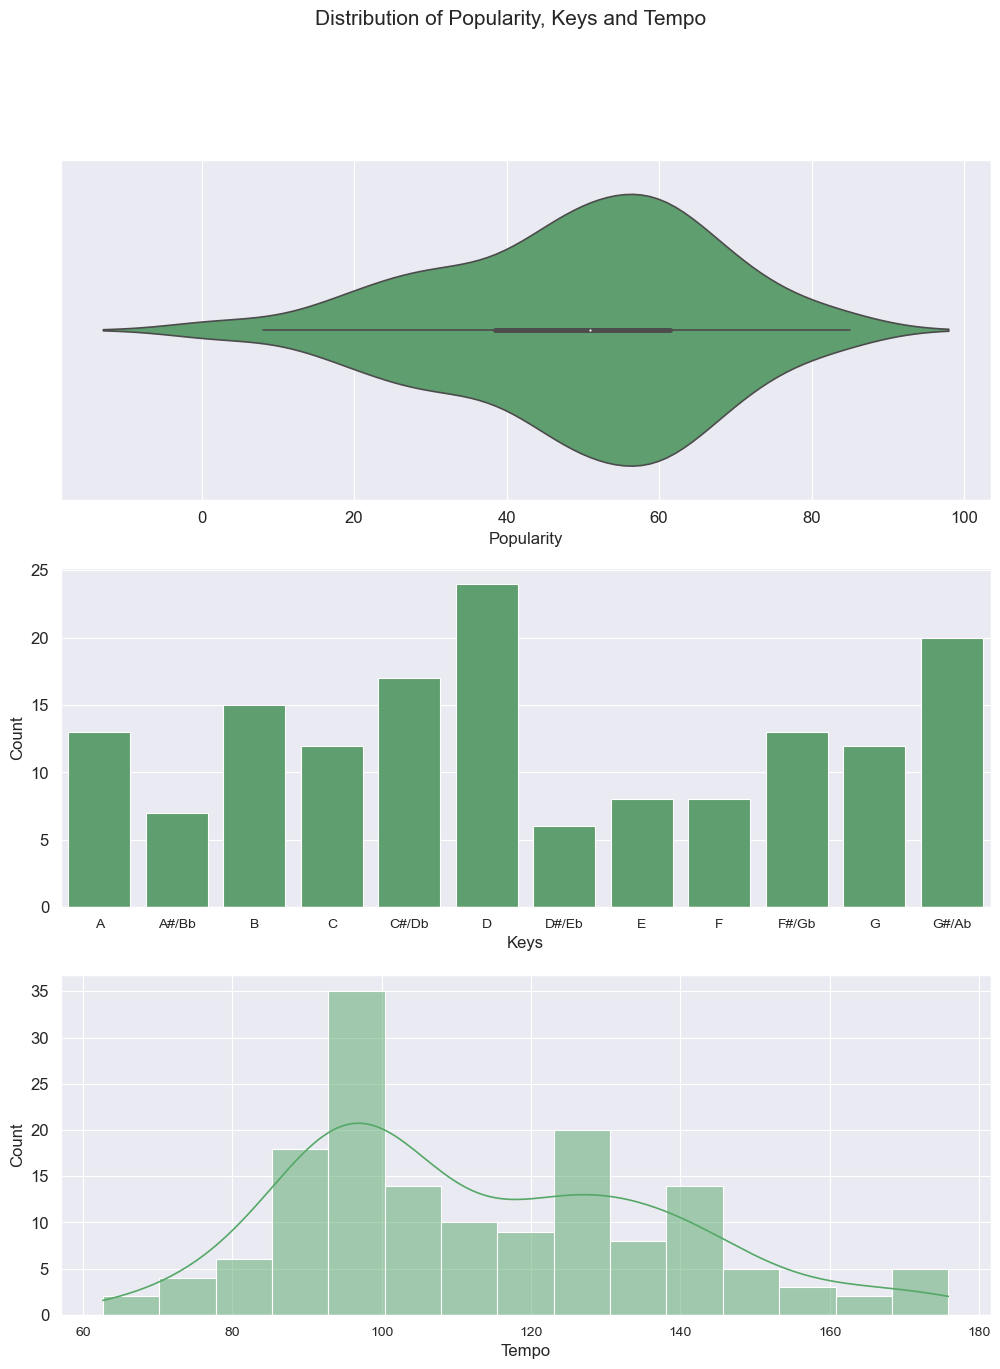

In [42]:
plt.figure(figsize=(12,15))
plt.suptitle('Distribution of Popularity, Keys and Tempo', fontsize=15);

plt.subplot(3,1,1);
sns.violinplot(data=df, x='popularity', color=base_colour);
plt.xlabel('Popularity', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('')
plt.yticks(fontsize=12);

plt.subplot(3,1,2);
keys = df.key.unique()
keys.sort()
key_order= keys.tolist()
sns.countplot(data=df, x='key', color=base_colour, order=key_order);
plt.xlabel('Keys', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12);


plt.subplot(3,1,3);
sns.histplot(df.tempo, color=base_colour, bins=15, kde=True);
plt.xlabel('Tempo', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12);

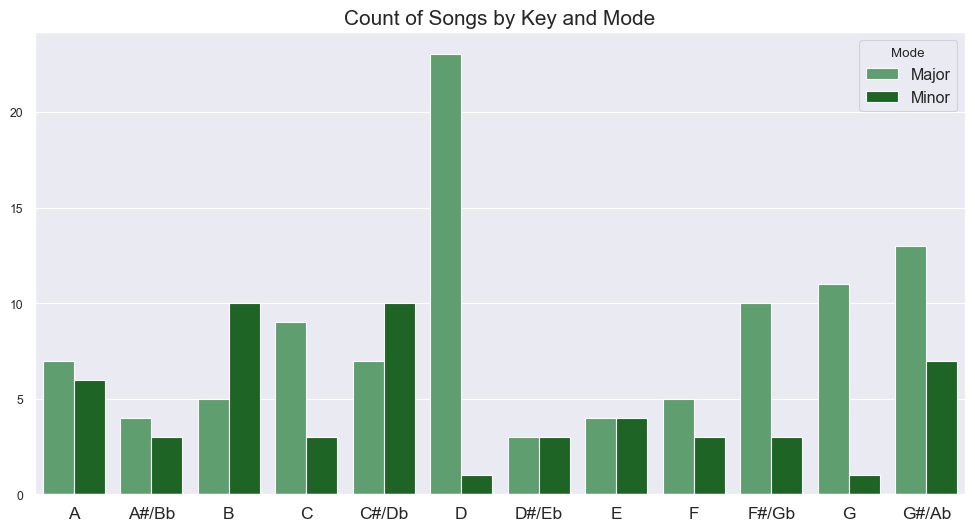

In [43]:
plt.figure(figsize=(12,6))
plt.title('Count of Songs by Key and Mode', fontsize=15)
sns.countplot(data=df, x='key', hue='mode', palette=[base_colour, sns.color_palette("dark")[2]], order=key_order)
plt.xticks(rotation=0, fontsize=12.5)
plt.legend(title='Mode', labels=['Major', 'Minor'], fontsize='large');
plt.xlabel('')
plt.ylabel('');

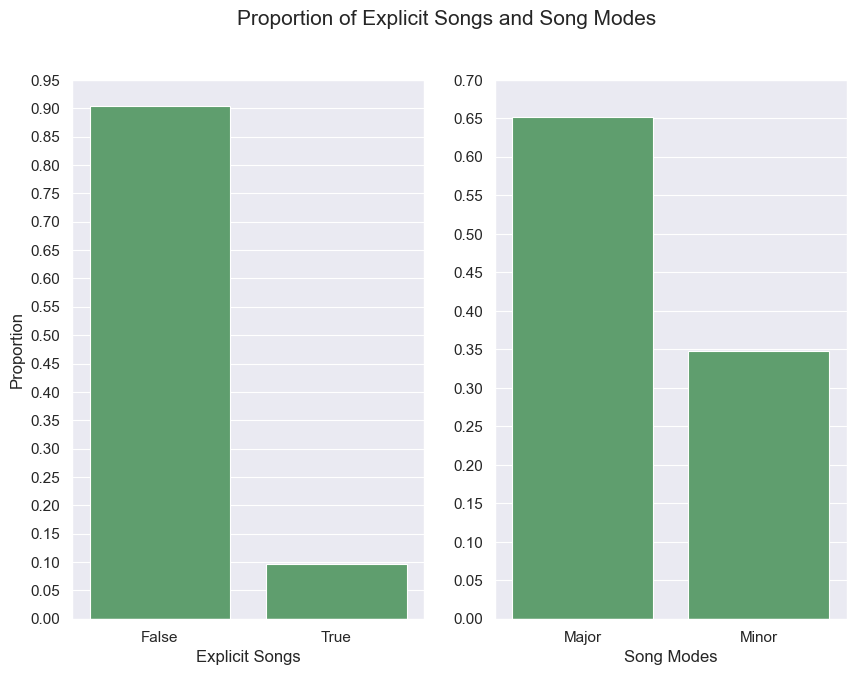

In [44]:
plt.figure(figsize=(10,7))
plt.suptitle('Proportion of Explicit Songs and Song Modes', fontsize=15)

plt.subplot(1,2,1);
tick_props, tick_names, var_sum = prop_(df.explicit)
sns.countplot(data=df, x='explicit', color=base_colour);
plt.xlabel('Explicit Songs', fontsize=12)
plt.xticks(fontsize=11)
plt.ylabel('Proportion', fontsize=12)
plt.yticks(tick_props * var_sum, tick_names, fontsize=11);

plt.subplot(1,2,2);
tick_props, tick_names, var_sum = prop_(df['mode'])
sns.countplot(data=df, x='mode', color=base_colour);
plt.xlabel('Song Modes', fontsize=12)
plt.xticks(fontsize=11)
plt.ylabel('')
plt.yticks(tick_props * var_sum, tick_names, fontsize=11);

In [45]:
# set the max width for album names to 10 characters
max_width = 10

# wrap album names to fit within max width
df['album_name'] = df['album_name'].apply(lambda x: "\n".join(textwrap.wrap(x, width=max_width)))

# create list of album names with more than one track i.e excluding singles
albums = df.groupby('album_id').filter(lambda x: len(x) > 2)['album_name'].unique().tolist()

# create list of album names with more than one track i.e excluding singles
singles = df.groupby('album_id').filter(lambda x: len(x) < 2)['album_name'].unique().tolist()

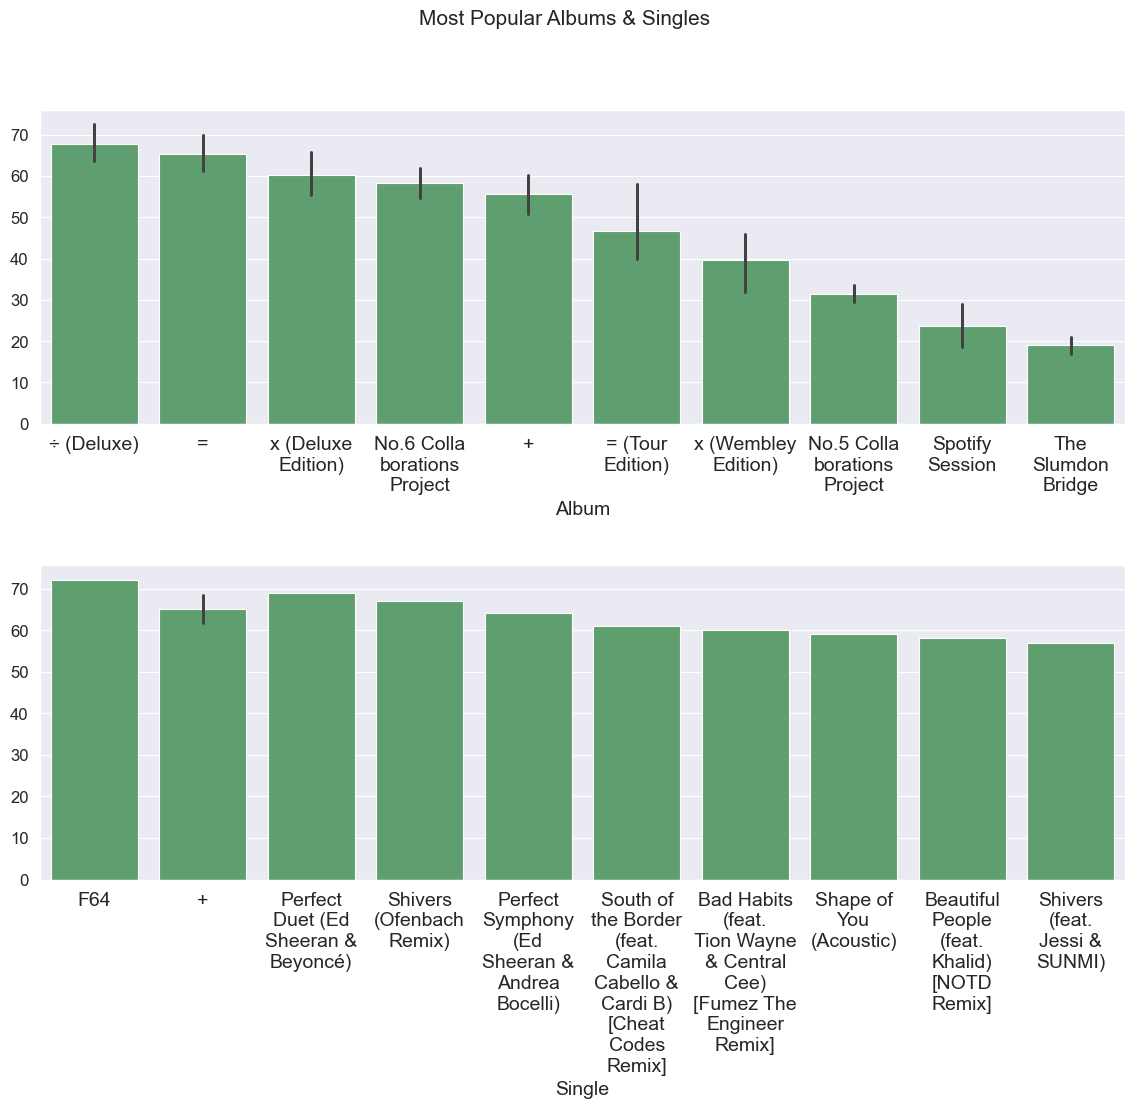

In [46]:
plt.figure(figsize=(14, 10));
plt.subplots_adjust(hspace=0.45)
plt.suptitle('Most Popular Albums & Singles', fontsize=15)

plt.subplot(2,1,1);
sns.barplot(data=df, x=df[df.album_name.isin(albums)].sort_values('popularity', ascending=False)['album_name'],\
            y=df[df.album_name.isin(albums)]['popularity'], color=base_colour);
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Album', fontsize=14)
plt.xticks(fontsize=14);


plt.subplot(2,1,2);
sns.barplot(data=df, x=df[df.album_name.isin(singles)].sort_values('popularity', ascending=False)\
            ['album_name'].head(16), y=df[df.album_name.isin(singles)]['popularity'], color=base_colour);
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Single', fontsize=14)
plt.xticks(fontsize=14);

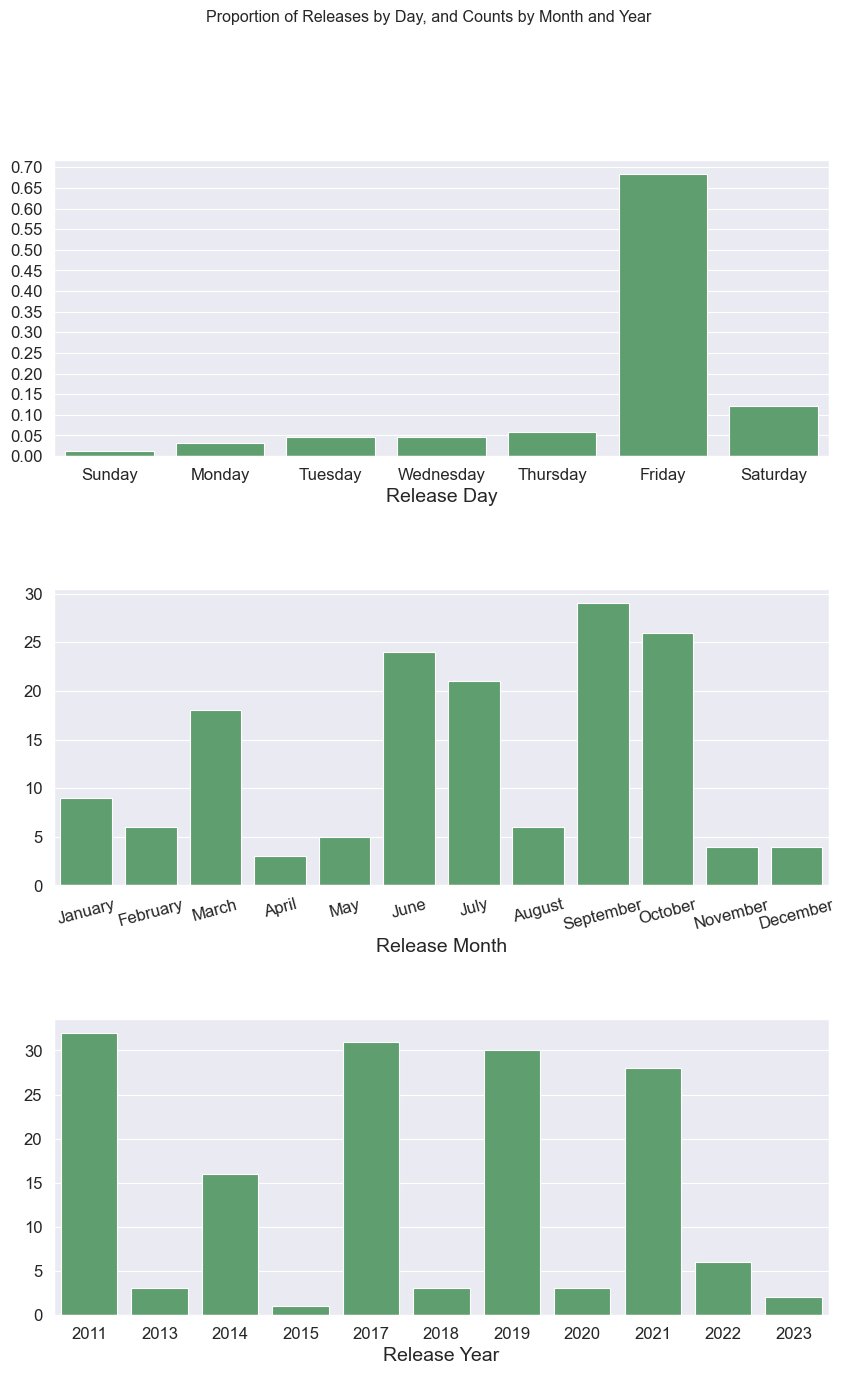

In [47]:
plt.figure(figsize = [10,15])
plt.subplots_adjust(hspace=0.45)
plt.suptitle('Proportion of Releases by Day, and Counts by Month and Year')


# For the first plot
plt.subplot(3,1,1)
tick_props, tick_names, var_sum = prop_(df.release_day)
sns.countplot(data = df, x = 'release_day', color = base_colour);
plt.yticks(tick_props * var_sum, tick_names, fontsize=12);
plt.ylabel('')
plt.xlabel('Release Day', fontsize=14)
plt.xticks(fontsize=12);


# For the second plot
plt.subplot(3,1,2)
sns.countplot(data = df, x = 'release_month', color = base_colour);
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Release Month', fontsize=14)
plt.xticks(fontsize=12, rotation=15);

# For the third plot
plt.subplot(3,1,3)
sns.countplot(data=df, x='release_year', color=base_colour);
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Release Year', fontsize=14)
plt.xticks(fontsize=12);

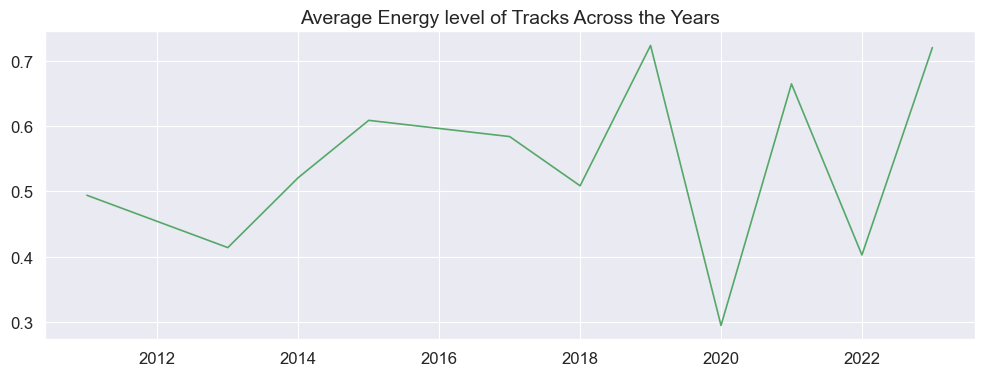

In [48]:
energy_by_year = df.groupby('release_year')['energy'].mean()
plt.figure(figsize=(12,4));
plt.plot(energy_by_year, color=base_colour);
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('')
plt.title('Average Energy level of Tracks Across the Years', fontsize=14)
plt.xticks(fontsize=12);

In [49]:
# Count the frequency of each artist name in the featured_artists column
artist_counts = df['featured_artists'].str.split(',').explode().str.strip().value_counts()

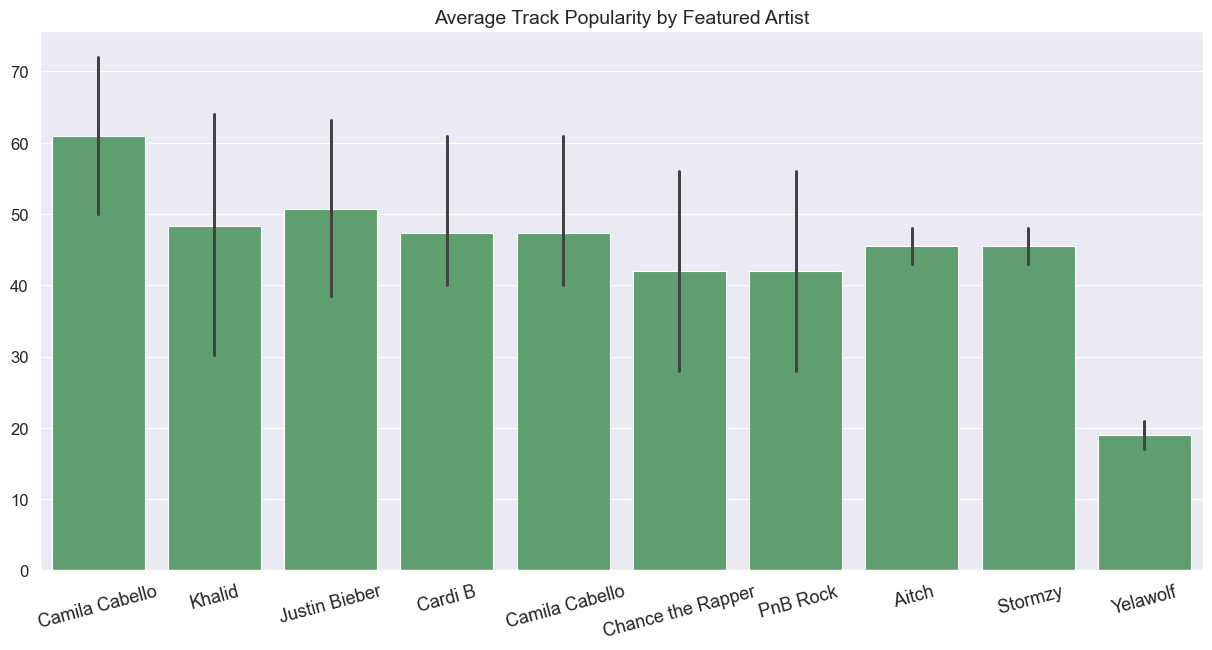

In [50]:
# duplicate the dataset
df_fa = df.copy()

# Split the featured_artists column into separate artists
df_fa['featured_artists'] = df_fa['featured_artists'].str.split(',')

# Create a new DataFrame with one row for each artist
artists_df = df_fa.explode('featured_artists')

# Get the top 10 artists by count
top_artists = artists_df['featured_artists'].value_counts().head(10).index.tolist()

# Plot the relationship between each artist and popularity
plt.figure(figsize=(15, 7))
sns.barplot(data=artists_df[artists_df['featured_artists'].isin(top_artists)],
            x='featured_artists', y='popularity', color=base_colour)
plt.title('Average Track Popularity by Featured Artist', fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=13, rotation=15);
plt.show()

<a id='Conclusion'></a>
# Conclusion
---
In conclusion, this analysis has provided interesting insights into the popularity, musical characteristics, and release patterns of Ed Sheeran's songs on Spotify. We found that his most popular songs are in the keys of **D** and **G#**, and they tend to be **Major** rather than **Minor**. The majority of his tracks received a popularity score between **50** and **60** out of 100.

Based on the analysis, it was found that Ed Sheeran's songs generally have a moderate to fast tempo range, with some variation between individual tracks. The mean tempo of his songs is **113.27 BPM (beats per minute)**, which is moderately fast; majority of his songs fall within the range of **95** to **130 BPM**. Additionally, his songs are usually not explicit, meaning that they contain little to no profanity, sexual content, or other types of explicit content.

**÷ (Deluxe)** is his most popular album, with the tracks averaging close to **70** on the popularity scale. Next are albums **=**, **× (Deluxe Edition)**, and **No. 6 Collaborations Project**.

Like many other artists, Ed Sheeran releases his songs mostly on Fridays. Almost **70%** of his tracks were released on Fridays, which suggests that he and his team are aware of the day's importance in music promotion.

Regarding featured artists, **Camila Cabello** is the artist he has collaborated with that has the highest popularity score out of over 20 artists he has featured on his songs.  It is worth noting that this dataset does not include live performances or tracks that he was featured on, so there may be other artists with whom he has collaborated and enjoyed success.

It is important to note that popularity alone is not enough to determine the success of a song. Other factors such as the number of streams, purchases, and overall impact on the music industry are also important to consider. Nonetheless, by gaining a deeper understanding of Ed Sheeran's success factors, we can gain insights into the music industry as a whole and the evolving tastes of music consumers. Ed Sheeran has become a beloved artist with a distinctive sound that resonates with fans around the world, and we are grateful for Spotify's wealth of data that allowed us to gain a deeper understanding of his music.

![Ed Sheeran performing Live](Media/Ed-Sheeran-live.png)
